In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [2]:
df = pd.read_pickle("/home/p_paki/Documents/Kit DataScience/Hackaton/final.pkl")
df['Title'] = df.index

In [6]:
summer_songs = pd.read_csv('/home/p_paki/Documents/Kit DataScience/Hackaton/Summer_songs_pv.csv', delimiter=';', usecols=['Title', 'Artist', 'Year', '0'])

In [33]:
final_final = pd.merge(df, summer_songs.loc[:,['Title','0']], how='left', on='Title')

In [46]:
final_final.to_pickle("/home/p_paki/Documents/Kit DataScience/Hackaton/final2.pkl")

In [91]:
final_final = pd.read_pickle("/home/p_paki/Documents/Kit DataScience/Hackaton/final2.pkl")

In [92]:
final_final = final_final.dropna()
final_final['is_success'] = final_final['0'].apply(lambda x : 1 if x > 500 else 0)
col = final_final['release'].apply(lambda x : x.month)
final_final = final_final.assign(month=col.values)

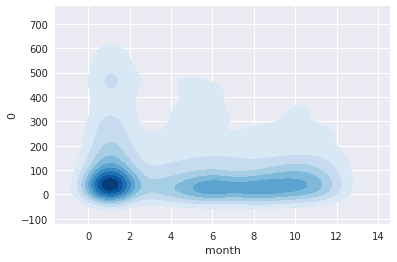

In [98]:
ax = sns.kdeplot(final_final['month'], final_final['0'], cmap="Blues", shade=True, shade_lowest=False)

/home/p_paki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/p_paki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


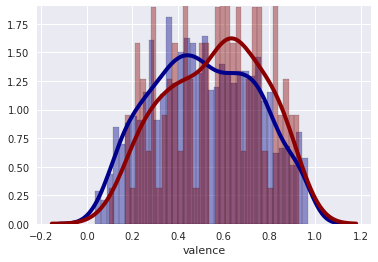

In [113]:
sns.distplot(final_final.loc[final_final['is_success'] == 0]['valence'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(final_final.loc[final_final['is_success'] == 1]['valence'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})